In [1]:
import NSLib2 as l
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm.auto import tqdm
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import chi2

DOF =  8
Chi square =  {0.006198715400619031}
Chi square critical =  {15.50731305586545}
Lifetime: 96.36253898605253 ± 12.844143893726377
Fit is acceptable at 5% level of significance: True



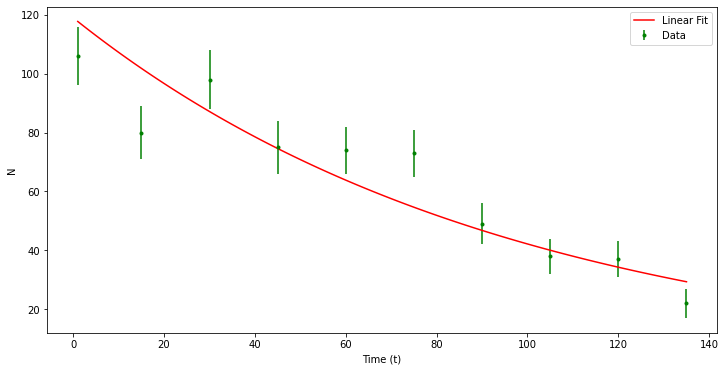

In [2]:
# Question 1

data = pd.read_csv('Q1_endsemfit.txt', sep="\s+", header=None)
data.columns = ['t', 'N', 'sigma_N']

# Define the decay function
def decay(t, a, b):
    return a * np.exp(-b * t)

# Perform a chi-square linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['t'], np.log(data['N']))

# Calculate the lifetime and its error
tau = -1 / slope
tau_error = std_err / slope**2

# Check if the fit is acceptable at the 5% level of significance
chi2_val = np.sum(((np.log(data['N']) - (intercept + slope * data['t'])) / data['sigma_N'])**2)
df = len(data['t']) - 2
chi2_critical = chi2.ppf(0.95, df)
print('DOF = ', df)
print(f'Chi square = ', {chi2_val})
print(f'Chi square critical = ', {chi2_critical})
print(f"Lifetime: {tau} ± {tau_error}")
print(f"Fit is acceptable at 5% level of significance: {chi2_val < chi2_critical}")
print()

plt.figure(figsize=(12, 6))
# Plotting the data points with error bars
plt.errorbar(data['t'], data['N'], yerr=data['sigma_N'], fmt='.',color='g', label='Data')

# Plotting the linear fit
t_values = np.linspace(data['t'].min(), data['t'].max(), 100)
fit_values = np.exp(intercept + slope * t_values)
plt.plot(t_values, fit_values, label='Linear Fit', color='red')

# Adding labels and legend
plt.xlabel('Time (t)')
plt.ylabel('N')
plt.legend()

# Show plot
plt.show()

First Root:
Volume: 3.929946
Second root:
Volume: 0.185694



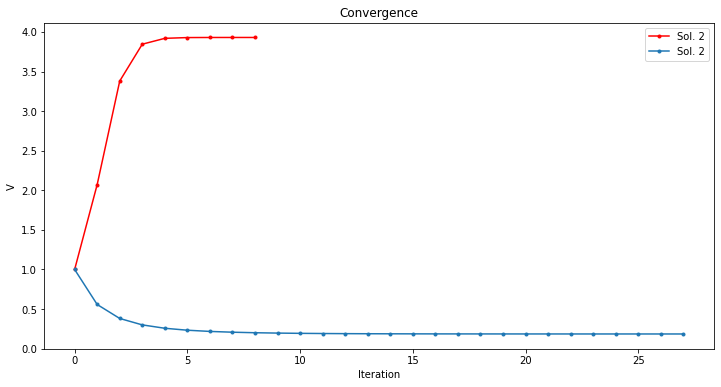

'Solutions with different fixed-point iterations are different because the van der Waals equation is a cubic equation in terms of V, and cubic equations can have up to three real roots. '

In [3]:
#Question 2

# Constants
p = 5.95
R = 0.0821
T = 300 #K
a = 6.254
b = 0.05422

print("First Root:")

# On rearranging 
def f1(V):
	return ((R * T) / (p + a/V**2)) + b

# Initial guess
V = 1
V_val1 = [V]

# Iteratively compute V
while True:
	V_next = f1(V)
	if abs(V_next - V) < 1e-5:
		break
	V = V_next
	V_val1.append(V)


print(f"Volume: {V:4f}")


print("Second root:")

# On rearranging 
def f2(V):
	return np.sqrt(((R * T)/(V - b) - p)**-1) * np.sqrt(a)

# Changing Initial Guess
V = 1
V_val2 = [V]

# Compute V by iteraion
while True:
	V_next = f2(V)
	if abs(V_next - V) < 1e-5:
		break
	V = V_next
	V_val2.append(V)


print(f"Volume: {V:4f}")
print()

plt.figure(figsize=(12, 6))
plt.plot(V_val1,'.-', color = 'r', label = 'Sol. 2')
plt.plot(V_val2,'.-', label= 'Sol. 2')
plt.title('Convergence')
plt.xlabel('Iteration')
plt.ylabel('V')
plt.legend()
plt.show()

'''Solutions with different fixed-point iterations are different because the van der Waals equation is a cubic equation in terms of V, and cubic equations can have up to three real roots. '''

In [4]:
#Question 5

# Load the matrix
A = np.loadtxt('Q5_endsemmat.txt')

# Print the matrix
print("Given Matrix:")
print(A)
print()


# Get the first two largest eigenvalues and their corresponding eigenvectors
eigenvalues = []
eigenvectors = []
A_n = A

for _ in range(2):
    
	eigenvalue, eigenvector = l.power_method(A_n, 500)
	eigenvalues.append(np.round(eigenvalue,4))
	eigenvectors.append(np.round(eigenvector,4))

	# Deflate the matrix
	A_n = A_n - eigenvalue * np.outer(eigenvector, eigenvector)

# Print the eigenvalues and eigenvectors
for i in range(2):
	print(f"Eigenvalue {i+1}: {eigenvalues[i]}")
	print(f"Eigenvector {i+1}: {eigenvectors[i]}")
	print()




Given Matrix:
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

Eigenvalue 1: 3.7321
Eigenvector 1: [ 0.2887 -0.5     0.5774 -0.5     0.2887]

Eigenvalue 2: 3.0
Eigenvector 2: [-0.5  0.5 -0.  -0.5  0.5]



Success probability: 0.484700


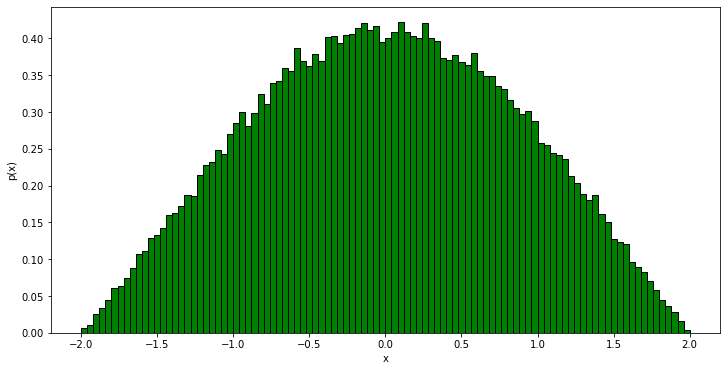

In [5]:
#Question 6

#p(x) = 0.5*(a**2 - x**2) for -a<=x<=a and a = 2 and zero elsewhere

# Constants
a = 2
N = 100000  # number of samples to generate

# Target distribution
def p(x):
	return 0.5 * (a**2 - x**2) if abs(x) < a else 0


# Generate samples
samples = []
num_rejected = 0
while len(samples) < N:
	x = np.random.normal(0, a)  # sample from Gaussian distribution
	u = np.random.uniform(0, 0.5 * a**2)  # uniform random number
	if u < p(x):
		samples.append(x)
	else:
		num_rejected += 1
sp = N / (N + num_rejected)
# Print success probability
print(f"Success probability: {sp:4f}")

# Plot histogram of samples
plt.figure(figsize=(12, 6))
# Define bin edges with separation
bin_edges = np.linspace(-a, a, 101)  # 100 bins, 101 edges
plt.hist(samples, bins=bin_edges, density=True, color='g', edgecolor='black')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()



In [6]:
#Question 7

# Simple Harmonic Oscillator

def psi(r0,alpha):
    if r0 < 2 and r0 > -2:
        return 0.5*(alpha**2 - r0**2)
def p(r0,alpha):
    return 0.25*(alpha**2 - r0**2)**2

def E(r0,alpha):
    return r0**7/7 - alpha**2*r0**5/5 + alpha**4*r0**3/3 + (alpha**2*r0 - r0**2/3)

alpha_list = np.linspace(0.1, 2.0, 200)  # variational parameters
E_list = []

for alpha in tqdm(alpha_list):
    r0 = 1
    step_size = 0.8
    r0_list = [r0]
    Aij = 0
    rej = 0 

    for _ in range(10000):
        old_prob = p(r0, alpha)
        r0_new = r0 + (2 * np.random.uniform() - 1) * step_size
        new_prob = p(r0_new, alpha)
        g = np.random.uniform()

        if g < min(1, new_prob / old_prob):
            r0 = r0_new
            r0_list.append(r0)
            Aij += 1
        else:
            rej += 1

    r0_list = np.array(r0_list)
    Ea = E(r0_list, alpha)
    av_E = Ea.mean()
    E_list.append(av_E)


min_E_index = np.argmin(E_list)
min_E = E_list[min_E_index]
corresponding_alpha = alpha_list[min_E_index]

print("Minimum Energy:", min_E)
print("Corresponding alpha value:", corresponding_alpha)




  0%|          | 0/200 [00:00<?, ?it/s]

Minimum Energy: -563990050941583.5
Corresponding alpha value: 1.9618090452261305


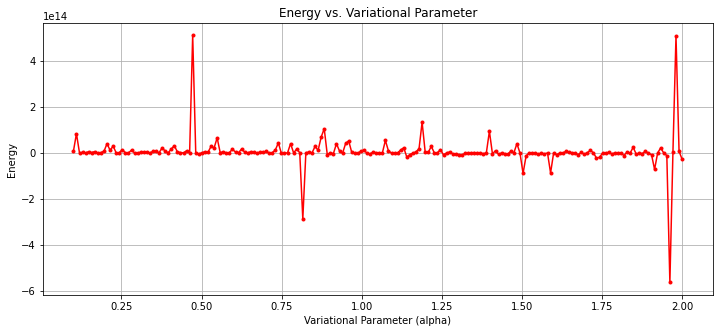

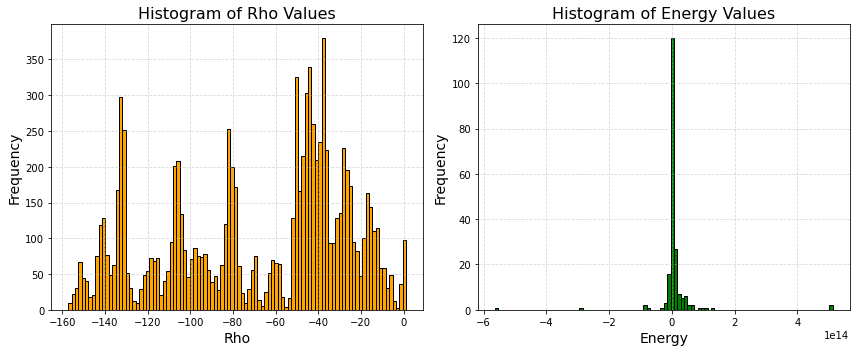

In [7]:
# Plot Energy vs. alpha

plt.figure(figsize=(12, 5))
plt.plot(alpha_list, E_list, 'r.-')
plt.xlabel('Variational Parameter (alpha)')
plt.ylabel('Energy')
plt.title('Energy vs. Variational Parameter')
plt.grid(True)
plt.show()


# Plotting histogram of rho_list
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(r0_list, bins=100, color='orange', edgecolor='black')
plt.xlabel('Rho', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Rho Values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

# Plotting histogram of energy_list
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(E_list, bins=100, color='g', edgecolor='black')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Energy Values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()